<a href="https://colab.research.google.com/github/Shamil2007/Machine-Learning/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
!kaggle datasets download larsen0966/student-performance-data-set

Dataset URL: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set
License(s): CC0-1.0
student-performance-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
!unzip /content/student-performance-data-set.zip

Archive:  /content/student-performance-data-set.zip
replace student-por.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: student-por.csv         


In [30]:
df = pd.read_csv("/content/student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


#Do students from urban or rural areas (address) perform differently?

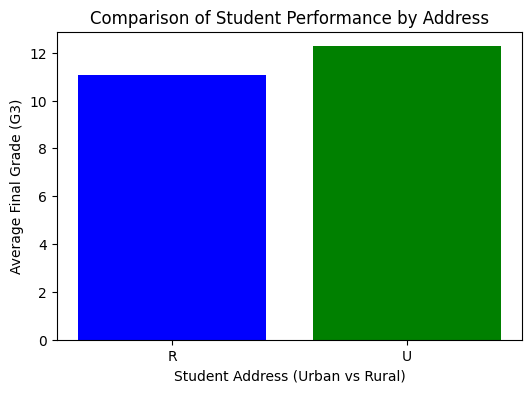

In [31]:
address_performance = df.groupby('address')['G3'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(address_performance['address'], address_performance['G3'], color=['blue', 'green'])

plt.xlabel('Student Address (Urban vs Rural)')
plt.ylabel('Average Final Grade (G3)')
plt.title('Comparison of Student Performance by Address')

plt.show()

#How does freetime affect academic success?

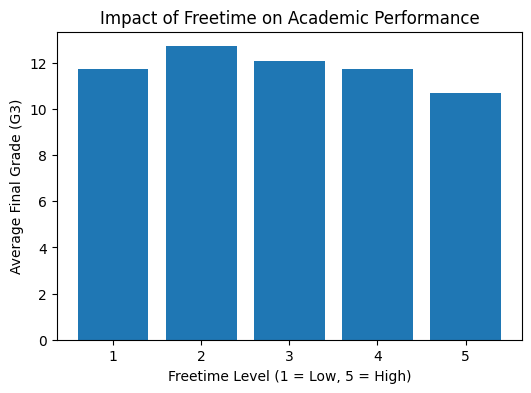

In [32]:
freetime_performance = df.groupby('freetime')['G3'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(freetime_performance['freetime'], freetime_performance['G3'])

plt.xlabel('Freetime Level (1 = Low, 5 = High)')
plt.ylabel('Average Final Grade (G3)')
plt.title('Impact of Freetime on Academic Performance')

plt.show()

#Do students with better health tend to have better grades?

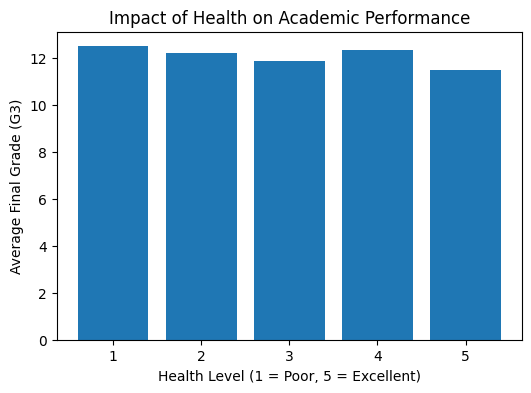

In [33]:
health_performance = df.groupby('health')['G3'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(health_performance['health'], health_performance['G3'])

plt.xlabel('Health Level (1 = Poor, 5 = Excellent)')
plt.ylabel('Average Final Grade (G3)')
plt.title('Impact of Health on Academic Performance')

plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [35]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [36]:
df['age'].min(), df['age'].max()

(15, 22)

In [37]:
X = df.drop('G3', axis = 1)
y = df['G3'].copy()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_num_train = X_train.select_dtypes(include = np.number)
X_cat_train = X_train.select_dtypes(include = 'object')

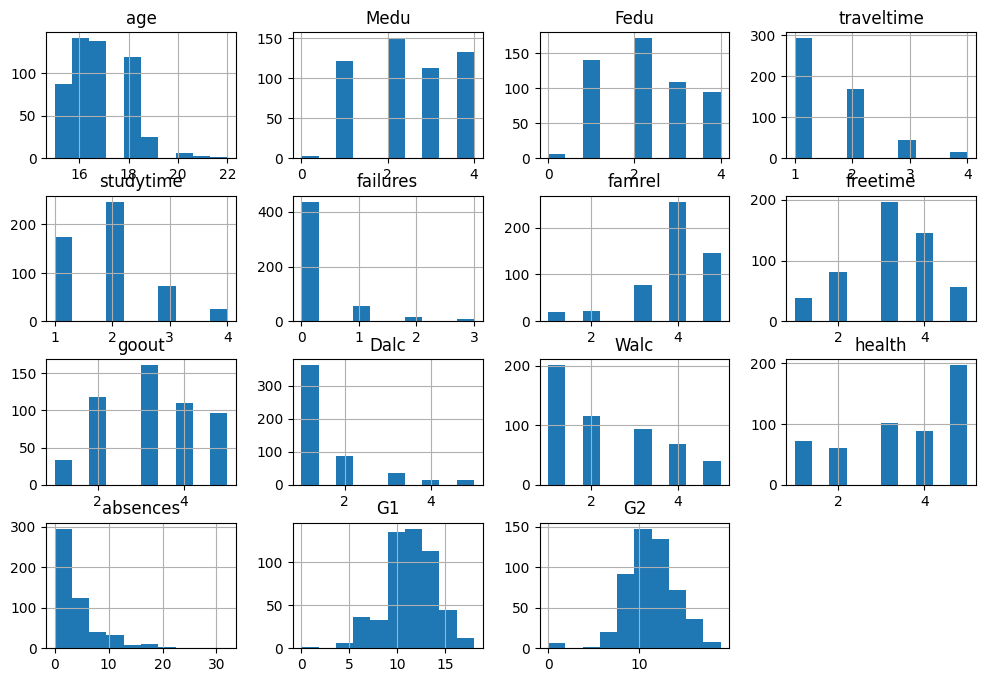

In [40]:
X_num_train.hist(figsize=(12, 8));

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [42]:
X_num_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='median')),
    ('Scaler', StandardScaler()),
    ('Poly', PolynomialFeatures(degree=1, include_bias=False)),
])

X_cat_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown="ignore"))
])

transformer = ColumnTransformer([
    ('X_num', X_num_pipeline, X_num_train.columns),
    ('X_cat', X_cat_pipeline, X_cat_train.columns)
], remainder='passthrough')

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
full_pipeline_logistic = Pipeline([
    ('preprocessing', transformer),
    ('lr', LinearRegression(n_jobs=-1))
])

full_pipeline_logistic.fit(X_train, y_train)
print(f"Train score: {full_pipeline_logistic.score(X_train, y_train)}, Test score: {full_pipeline_logistic.score(X_test, y_test)}")

Train score: 0.8583369853635902, Test score: 0.8486513286537314


In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
full_pipeline_tree = Pipeline([
    ('preprocessing', transformer),
    ('tree', DecisionTreeRegressor())
])

full_pipeline_tree.fit(X_train, y_train)
print(f"Train score: {full_pipeline_tree.score(X_train, y_train)}, Test score: {full_pipeline_tree.score(X_test, y_test)}")

Train score: 1.0, Test score: 0.7199703890682265


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
full_pipeline_forest = Pipeline([
    ('preprocessing', transformer),
    ('forest', RandomForestRegressor())
])

full_pipeline_forest.fit(X_train, y_train)
print(f"Train score: {full_pipeline_forest.score(X_train, y_train)}, Test score: {full_pipeline_forest.score(X_test, y_test)}")

Train score: 0.9767449040760197, Test score: 0.833665093080265


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params_forest = {
    'forest__n_estimators': [55, 60, 65],
    'forest__criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'forest__max_depth': [4], # after choosing best depth for overcome overfitting
    'forest__min_samples_split': [2, 3, 4],
    'forest__min_samples_leaf': [3, 4, 5],
    'forest__n_jobs': [-1]
}

grid_forest = GridSearchCV(full_pipeline_forest, params_forest, cv=3)
grid_forest.fit(X_train, y_train)

print("Best parameters:", grid_forest.best_params_)

Best parameters: {'forest__criterion': 'friedman_mse', 'forest__max_depth': 4, 'forest__min_samples_leaf': 3, 'forest__min_samples_split': 3, 'forest__n_estimators': 55, 'forest__n_jobs': -1}


In [51]:
grid_forest.best_estimator_.fit(X_train, y_train)
print(f"Train score: {grid_forest.best_estimator_.score(X_train, y_train)}, Test score: {grid_forest.best_estimator_.score(X_test, y_test)}")

Train score: 0.8932468032352385, Test score: 0.8502177022607433


In [55]:
from sklearn.ensemble import VotingRegressor

voting_clf = VotingRegressor(
    estimators = [
        ('lr', LinearRegression(n_jobs=-1)),
        ('rf', RandomForestRegressor(
            random_state=42,
            criterion="friedman_mse",
            max_depth=4,
            min_samples_leaf=3,
            min_samples_split=2,
            n_estimators=60,
            n_jobs=-1
        )),
    ]
)

voting_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('voting', voting_clf)
])

voting_pipeline.fit(X_train, y_train)
print(f"Train score: {voting_pipeline.score(X_train, y_train)}, Test score: {voting_pipeline.score(X_test, y_test)}")

Train score: 0.8851451730421569, Test score: 0.8621302921208429
